#### [HOME](../README.md) | [NEXT](2.OOP_Multi_Feature_Linear_Regression.ipynb)

---

# OOP Linear Regression Implementation

This Jupyter Notebook provides a basic implementation of Single Feature Linear Regression. The data set contains measurements on a single species of insect captured on two continents. We want to predict an male insects latitude given the wingspan.

#### Step 1 - Import Dependencies

In [7]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.linear_model import LinearRegression

#### Step 2 - Import, Filter and Visualise The Data

In [8]:
#Import data as a Pandas DataFrame
insects = pd.read_csv('./data/insects.csv', sep='\t')
insects = pd.DataFrame({
    'continent': insects['continent'],
    'latitude': insects['latitude'],
    'sex': insects['sex'],
    'wingsize': insects['wingsize']
})

# Filter the data to only male insects
insects = insects[insects.sex == 1]

# Features variable
X_insects = insects[['wingsize']]
# Target variable
y_insects = insects['latitude']

insects.head()

,continent,latitude,sex,wingsize
21,1,35.5,1,797
22,1,37.0,1,806
23,1,38.6,1,812
24,1,40.7,1,807
25,1,40.9,1,818


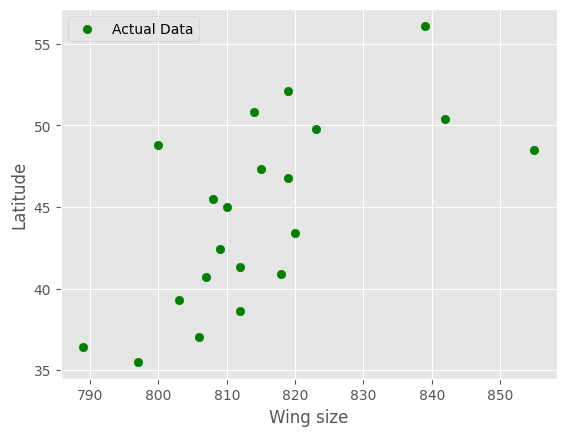

In [9]:
#Plot the data
plt.scatter(X_insects, y_insects, label="Actual Data", color='g')
plt.xlabel("Wing size")
plt.ylabel("Latitude")
plt.legend()
plt.show()

#### Step 3: Instantiate a LinearRegression Object

In [10]:
insects_regression = LinearRegression()

#### Step 4: Fit the model

In [11]:
insects_regression.fit(X_insects, y_insects)

LinearRegression()

#### Step 5: Predict Values

In [16]:
# Predict the target for the whole dataset
latitude_predictions = insects_regression.predict(X_insects)

#Predict the target for a new data point
new_insect = pd.DataFrame({
    'wingsize': [800]
})
new_insect['latitude'] = insects_regression.predict(new_insect)
print(f"New insect is:\n{new_insect}")

New insect is:
   wingsize   latitude
0       800  40.870569


#### Step 6: Plot the Predictions

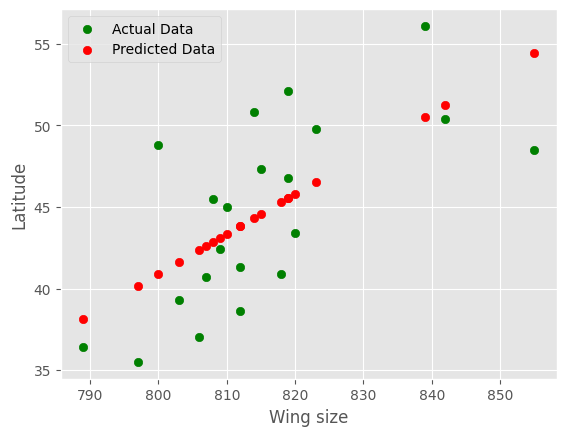

In [13]:
#Plot the predictions compared to the actual data
plt.scatter(X_insects, y_insects, label="Actual Data", color='g')
plt.scatter(X_insects, latitude_predictions, label="Predicted Data", c='r')
plt.xlabel("Wing size")
plt.ylabel("Latitude")
plt.legend()
plt.show()

#### Step 7: Evaluate The Model

In [14]:
#Calculate the loss and cost of the model
model_loss = pd.DataFrame({
    'Target': y_insects,
    'Predicted result': latitude_predictions,
    'Loss': y_insects - insects_regression.predict(X_insects).round(2)
})
model_cost = model_loss['Loss'].sum() / model_loss.shape[0]

print(f"The cost or average loss of this model is {model_cost:.5f}")
print(model_loss)

The cost or average loss of this model is -0.00000
    Target  Predicted result  Loss
21    35.5         40.129389 -4.63
22    37.0         42.352930 -5.35
23    38.6         43.835290 -5.24
24    40.7         42.599990 -1.90
25    40.9         45.317651 -4.42
26    42.4         43.094110 -0.69
27    45.0         43.341170  1.66
28    46.8         45.564711  1.24
29    48.8         40.870569  7.93
30    49.8         46.552951  3.25
31    50.8         44.329410  6.47
32    36.4         38.152908 -1.75
33    39.3         41.611749 -2.31
34    41.3         43.835290 -2.54
35    43.4         45.811771 -2.41
36    45.5         42.847050  2.65
37    47.3         44.576470  2.72
38    48.5         54.458874 -5.96
39    50.4         51.247093 -0.85
40    52.1         45.564711  6.54
41    56.1         50.505912  5.59
